# Inhalt

* [IPython-Notebooks](#ip-notebooks)
* [Python als Taschenrechner](#erste_schritte)
* [Symbolische Mathematik](#symbolische_mathematik)
* [Graphische Ausgaben](#graphische_ausgaben)

<a name="ip-notebooks"></a>
# IPython-Notebooks
*Prof. Dr. Matthias Vögeler*

Ein [IPython-Notebook](http://ipython.org/notebook.html) ist eine interaktive Entwicklunsumgebung. Es kann genutzt werden
* um Python-Code auszuführen,
* formatierten Text zu erzeugen,
* Mathematik zu betreiben,
* graphische Ausgaben zu erzeugen,
* Daten zu analysieren.

Ein IPython-Notebook ist eine Web-Applikation, alle Berechnungen werden auf dem Server durchgeführt, seine Ausgaben werden im Browser dargestellt. Die Ausgaben werden asynchron übertragen.

Formatierter Text kann mit Hilfe der [Markdown-Syntax](http://daringfireball.net/projects/markdown) eingeben werden. Außerdem können LaTex-Formeln
$$ F(x) = \int_0^\infty e^{-x} \; dx $$
dargestellt werden.

Das Einbetten von YouTube-Videos ist ebenfalls möglich.

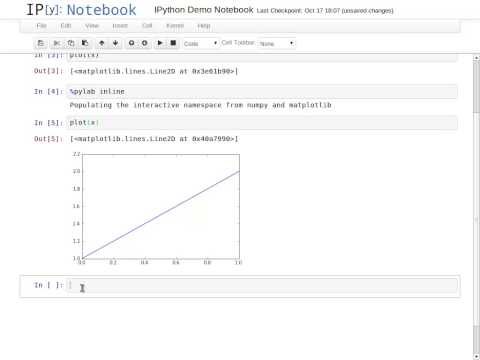

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("qb7FT68tcA8")

IPython-Notebooks können leicht in andere Formate wie HTML oder PDF exportiert werden.

Einen guten Überblick über die vielfältigen Möglichkeiten dieser Entwicklungsumgebung kann man durch stöbern in [Gallerien](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks) gewinnen.

<a name="erste_schritte"></a> 
## Erste Schritte
Python kann wie ein Taschenrechner verwendet werden:

In [2]:
# Addition/Subtraktion
10-100

-90

In [3]:
# Multiplikation
234234*64525

15113948850

In [4]:
# Division
[3/2, 3//2]

[1.5, 1]

In [5]:
# Exponentiation
2**512

13407807929942597099574024998205846127479365820592393377723561443721764030073546976801874298166903427690031858186486050853753882811946569946433649006084096

In [6]:
# modulare Arithmetik
print(f'234234 mod 31234234 = {234234 %31}')
print(f'2^512 mod 3 = {pow(2,512,3)}')

234234 mod 31234234 = 29
2^512 mod 3 = 1


Beim Rechnen mit Zahlen sind 2 Datentypen zu unterscheiden: Fließkommazahlen (double-precision) und Ganzzahlen ($\mathbb Z$).

Auch können Variablen und Funktionen definert werden.

In [2]:
from math import sin
import numpy as np

def f(x):
    return sin(x)/(x**2 +1)

Wertetabelle = [(x,f(x)) for x in np.arange(0.0,3.0,0.5)]

for x, f in Wertetabelle:
    print("{:10.4f}{:10.4f}".format(x,f))

    0.0000    0.0000
    0.5000    0.3835
    1.0000    0.4207
    1.5000    0.3069
    2.0000    0.1819
    2.5000    0.0825


In [3]:
np.arange(0,10,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

Autovervollständigung erhält man druch Drücken von **TAB** und Hilfe durch **SHIFT-TAB**.

## Vektoren und Matrizen

Zum Anlegen von mehrdimensionalen Datenstrukturen, Z.B. Matrizen, kann die Klasse `array` der `numpy`-Bibliothek verwendent werden.

In [5]:
A = np.array([[2,4,0],[-1,0,3]])
print("A = \n",A)
print("3A = \n",3*A)
print("A^t = \n",A.transpose())
print("(2A + A)*A^t= \n",np.dot(2*A+A, A.transpose()))

A = 
 [[ 2  4  0]
 [-1  0  3]]
3A = 
 [[ 6 12  0]
 [-3  0  9]]
A^t = 
 [[ 2 -1]
 [ 4  0]
 [ 0  3]]
(2A + A)*A^t= 
 [[60 -6]
 [-6 30]]


Die Elemente eines Arrays können zugleich ausgewertet werden.

In [10]:
np.exp(A)

array([[ 7.3890561 , 54.59815003,  1.        ],
       [ 0.36787944,  1.        , 20.08553692]])

Es sind keine `for`-Schleifen notwendig, was enorm Rechenzeit spart.

In [9]:
%timeit [sin(x) for x in np.arange(0,6,0.01)]

79 µs ± 583 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [10]:
%timeit np.sin(np.arange(0,6,0.01))

10.3 µs ± 50.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Lösen von linearen Gleichungssystemen

Wir wollen das folgende Gleichungssystem lösen

$$ \begin{pmatrix}
        2 & 3 & -1 & 0 \\
        4 & 6 & 2 & -3 \\
        -6 & -5 & 0 & 2 \\
        2 & -5 & 6 & -6
       \end{pmatrix}
       \cdot x = 
       \begin{pmatrix} -1 \\ 2 \\ 0 \\ 1 \end{pmatrix}
$$

In [11]:
A = np.array([[2,3,-1,0],[4,6,2,-3],[-6,-5,0,2],[2,-5,6,-6]])
b = np.array([[-1],[2],[0],[1]])

x = np.linalg.solve(A,b)
print("x = \n",x)
print("A x = \n",np.dot(A,x))
print("x = A^(-1) b\n", np.dot(np.linalg.inv(A),b))

x = 
 [[1.125]
 [0.25 ]
 [4.   ]
 [4.   ]]
A x = 
 [[-1.]
 [ 2.]
 [ 0.]
 [ 1.]]
x = A^(-1) b
 [[1.125]
 [0.25 ]
 [4.   ]
 [4.   ]]


Für Standardmartizen gibt es fertige `numpy`-Funktionen.

* `np.zeros((3,2))`  liefert eine (3,2)-Nullmatrix,
* `np.eye(4)` eine (4,4)-Einheitsmatrix,
* `np.empty((2,3))` eine nicht-initialisierte (2,3)-Matrix.

<a name="symbolische_mathematik"></a> 
## Symbolische Mathematik

Wenn man nicht an numerische Rechnungen interessiert ist, sondern symbolische mathematiche Umformungen ausführen möchte, so kann man das Modul `sympy` verwenden. Hier die [Dokumentation](http://docs.sympy.org).

Der folgende Abschnitt zeigt ein paar einfache Rechnungen zu den Themen:
* Nullstellen eines Polynoms,
* Integral- und Differentialrechnung,
* Matrizenrechnung

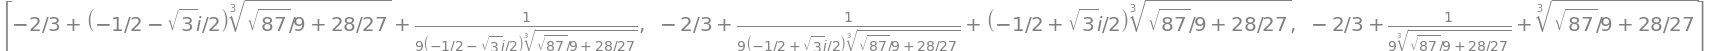

In [12]:
from sympy import *
init_printing()

x = symbols('x')

# Berechnet die 3 Nullstellen eines Polynoms vom Grad 3
solve(x**3 + 2*x**2 + x - 2, x)

In [13]:
# Berechnung einer Ableitung
diff(sin(3*x**4)*exp(x**2)*x, x)

In [14]:
# Berechnung eines Integrals
integrate(sin(x**2), (x, 0, oo))

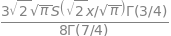

In [15]:
integrate(sin(x**2))

In [16]:
Matrix([[1, 2], [2, 2]]).eigenvals()

<a name="graphische_ausgaben"></a> 
## Graphische Ausgaben

### matplotlib

Zur Erstellung von wissenschaftlichen 2D/3D-Graphiken eignet sich das Modul `matplotlib` zusammen mit `numpy` sehr. Die Graphiken werden algorithmisch erzeugt und sind daher reproduzierbar.

Die wesentlichen Stärken dieser Bibliothek sind:
* Einfache Syntax, MatLab-ähnlich,
* Unterstützung von LaTex-formatierten Beschriftungen,
* Kontrolle der Eigenschaften jedes Elementes einer Grafik (z.B. Schriftart, Ausgabegröße und Auflösung),
* Export in andere Standarddateiformate, z.B. PNG, JPG, SVG, PDF

Ein großartiges IPython-Notebook zu `matplotlib` findet sich [hier](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb).

In [6]:
# Graphiken werden in das Notebook integriert
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from math import pi

[]

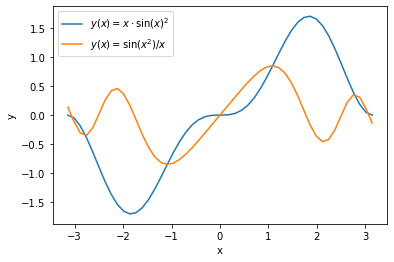

In [7]:
x = np.linspace(-pi,pi,50)
y = x*np.sin(x)**2
plt.plot(x,y,label="$y(x) = x \cdot \sin(x)^2$")
plt.plot(x,np.sin(x**2)/x,label="$y(x) = \sin(x^2) / x$")
plt.legend(loc=2)
plt.xlabel('x')
plt.ylabel('y')
plt.plot()

In [8]:
print(x)
print(y)

[-3.14159265 -3.01336438 -2.88513611 -2.75690784 -2.62867957 -2.5004513
 -2.37222302 -2.24399475 -2.11576648 -1.98753821 -1.85930994 -1.73108167
 -1.60285339 -1.47462512 -1.34639685 -1.21816858 -1.08994031 -0.96171204
 -0.83348377 -0.70525549 -0.57702722 -0.44879895 -0.32057068 -0.19234241
 -0.06411414  0.06411414  0.19234241  0.32057068  0.44879895  0.57702722
  0.70525549  0.83348377  0.96171204  1.08994031  1.21816858  1.34639685
  1.47462512  1.60285339  1.73108167  1.85930994  1.98753821  2.11576648
  2.24399475  2.37222302  2.5004513   2.62867957  2.75690784  2.88513611
  3.01336438  3.14159265]
[-4.71163432e-32 -4.92762474e-02 -1.85631527e-01 -3.88242442e-01
 -6.32995808e-01 -8.94501962e-01 -1.14809477e+00 -1.37166528e+00
 -1.54719475e+00 -1.66188096e+00 -1.70878774e+00 -1.68698734e+00
 -1.60120678e+00 -1.46102846e+00 -1.27972925e+00 -1.07286906e+00
 -8.56756659e-01 -6.46926883e-01 -4.56758699e-01 -2.96348395e-01
 -1.71728107e-01 -8.44886909e-02 -3.18304850e-02 -7.02850341e-03
 

#### Weitere 2D-Grafikformate

Siehe dazu [hier](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb#Other-2D-plot-styles)

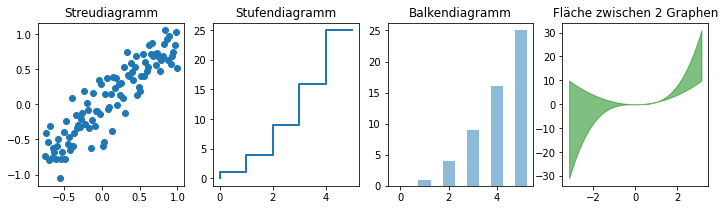

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))

xx = np.linspace(-0.75, 1., 100)
axes[0].scatter(xx, xx + 0.25*np.random.randn(len(xx)))
axes[0].set_title("Streudiagramm")

n = np.array([0,1,2,3,4,5])

axes[1].step(n, n**2, lw=2)
axes[1].set_title("Stufendiagramm")

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[2].set_title("Balkendiagramm")

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[3].set_title("Fläche zwischen 2 Graphen");

### bqplot

[bqplot](https://github.com/bqplot/bqplot) ist eine interaktive 2D-Grafikbibliothek, es baut eine Brücke zwischen `Python` und `d3.js` 

In [21]:
import bqplot.pyplot as bqplt
from ipywidgets import FloatSlider, HBox, VBox
import numpy as np

In [22]:
def sinus(amplitude = 1.0, freq=1.0, phi=0.0):
    x = np.arange(-6, 6, 0.01)
    y = amplitude * np.sin(freq * x + phi)
    return x, y

In [23]:
x, y = sinus()

# plot the sinus
title = f'{1:.1f} sin({1:.1f} x + {1:.1f})'
fig = bqplt.figure(title=title)
fig_line = bqplt.plot(x, y, 'm', stroke_width=3)
bqplt.ylim(-2,2)

# use 3 sliders to represent amplitude, freq, phi
amplitude_slider = FloatSlider(description='amplitude', value=1, min=-2, max=2, step=0.1)
freq_slider = FloatSlider(description='freq', value=1, min=0.1, max=4, step=0.1)
phi_slider = FloatSlider(description='phi', value=0, min=-4, max=4, step=0.1)

slider_layout = HBox([amplitude_slider, freq_slider, phi_slider])

In [24]:
def update_sinus(change):
    amplitude = amplitude_slider.value
    freq = freq_slider.value
    phi = phi_slider.value
    # update y
    fig_line.x, fig_line.y = sinus(amplitude, freq, phi)
    # also update the fig title
    fig.title = f'{amplitude:.1f} sin({freq:.1f} x + {phi:.1f})'

# register the above callback with the 'value' trait of the sliders
for slider in [amplitude_slider, freq_slider, phi_slider]:
    slider.observe(update_sinus, 'value')

In [25]:
final_layout = VBox([fig, slider_layout])
final_layout